# Avacado Project

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Importing Data

In [1]:
import pandas as pd
Avacado=pd.read_csv("Avacado.csv",sep=",") #reading Avacado.csv file
Avacado.head() #Looking into top 5 rows

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [2]:
Avacado.shape #Checking the shape of our data

(16468, 14)

# Identifing the type of Problem

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold

In [3]:
Avacado.dtypes #Checking the datatype of each attribute

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

As per problem statement Target variable i.e. AveragePrice is float64 i.e. continuous value so we'll use Regression to learn our model.

# Exploratory Data Analysis

## Handling Null Values

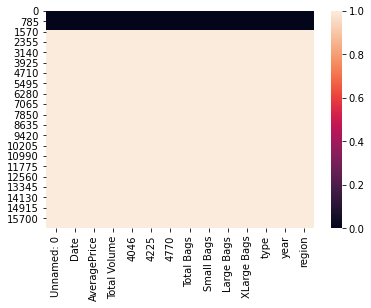

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(Avacado.isnull()) #Looking for null values if any, in heatmap

In [5]:
Avacado.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

Avacado (our dataset) have 14951 empty rows.
Let's remove all blank rows.

In [6]:
#Removing blank rows i.e. empty rows.
Avacado_new = Avacado[Avacado.notnull().any(axis=1)]

In [7]:
Avacado_new.head() #Checking top 5 rows of dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [8]:
Avacado_new.shape #Checking the shape of dataset

(1517, 14)

After removing 14951 empty rows, we have 1517 rows left in dataset.

In [9]:
#Removing Unnamed: 0 column becuase it's not in our problem statement as well as it have repetative values 0-52, which is not going to help in prediction
Avacado_new.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
Avacado_new.head() #Checking top 5 rows of dataset

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [11]:
Avacado_new.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


# Univariate Analysis

Total number of Regions are =  52


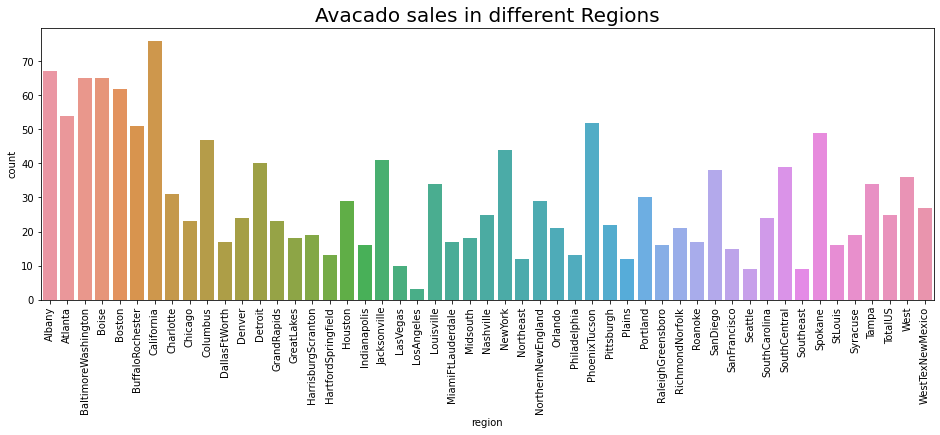

In [12]:
import matplotlib.pyplot as plt
print("Total number of Regions are = ",len(Avacado['region'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="region", data=Avacado_new)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Avacado sales in different Regions", fontsize = 20)
plt.show()

California have the highest sales, where as Los Angles has least sales

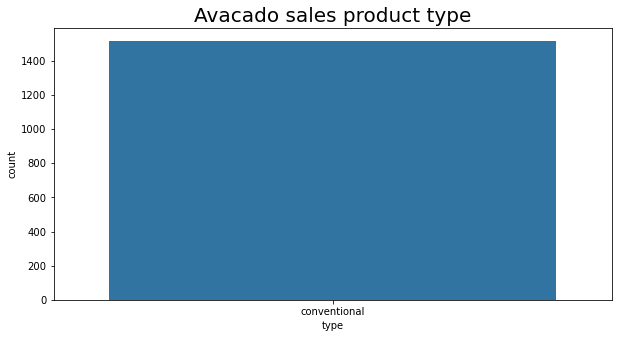

In [13]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="type", data=Avacado_new)
plt.title("Avacado sales product type", fontsize = 20)
plt.show()

Avacado have only 1 type of product which is conventional

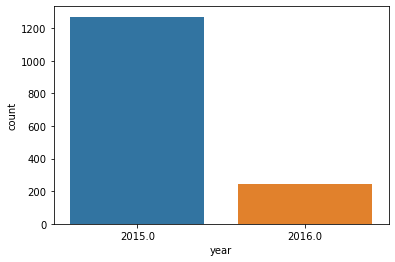

In [14]:
sns.countplot(x='year', data=Avacado_new)

Avacado have 2 years data 2015 and for 2016.

In 2015 Sale was more and in 2016 sales was less

# Bivariate Analysis

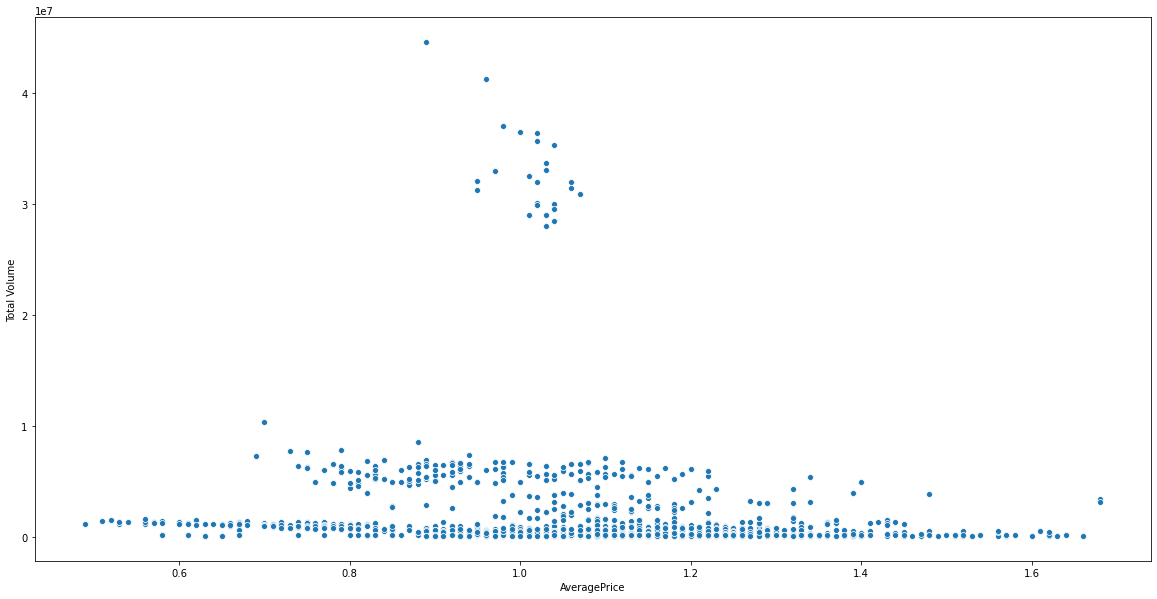

In [15]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'Total Volume', data = Avacado_new)

    The average price per Toatl Volume is spread across the range of Average Price.
    The Majority of Total Volume lies under 1,00,00,000.

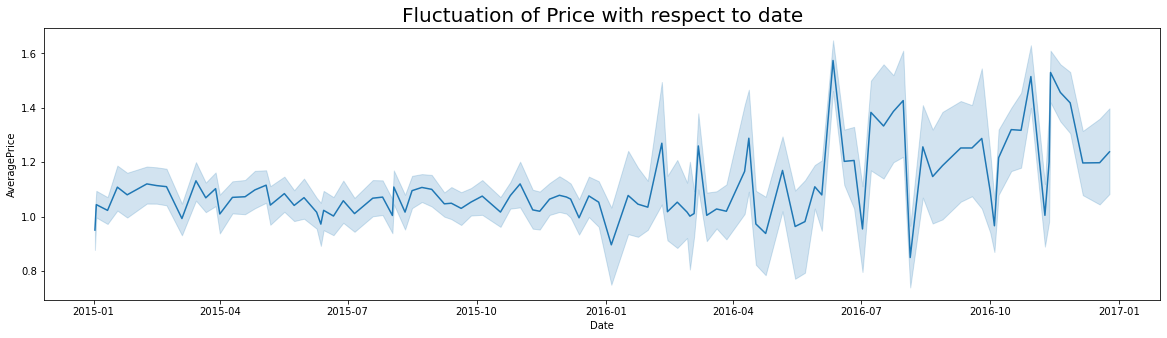

In [16]:
Avacado_new['Date'] = pd.to_datetime(Avacado_new['Date'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="AveragePrice",  data=Avacado_new)
plt.title("Fluctuation of Price with respect to date", fontsize = 20)
plt.show()

AveragePrice going up at the beggining of the year.

These are high drops and high spikes after 2016-04

From start to last Average price increased.

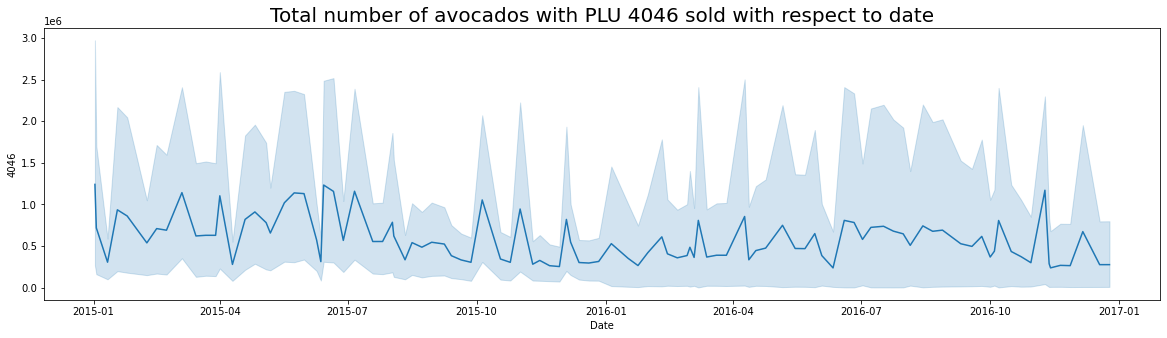

In [17]:
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="4046",  data=Avacado_new)
plt.title("Total number of avocados with PLU 4046 sold with respect to date", fontsize = 20)
plt.show()

PLU 4046 drops at the beggining of the year.

These drops and pikes are a sign of seasonality and that could help in forecasting.

From start to last the Total number of avocados with PLU 4046 sold decreased.

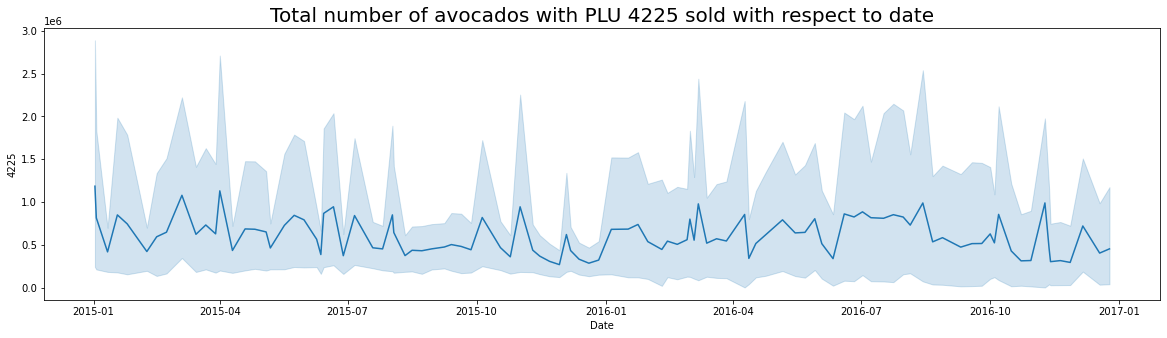

In [18]:
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="4225",  data=Avacado_new)
plt.title("Total number of avocados with PLU 4225 sold with respect to date", fontsize = 20)
plt.show()

PLU 4225 drops at the beggining of the year.

These drops and pikes are a sign of seasonality and that could help in forecasting.

From start to last the Total number of avocados with PLU 4225 sold decreased.

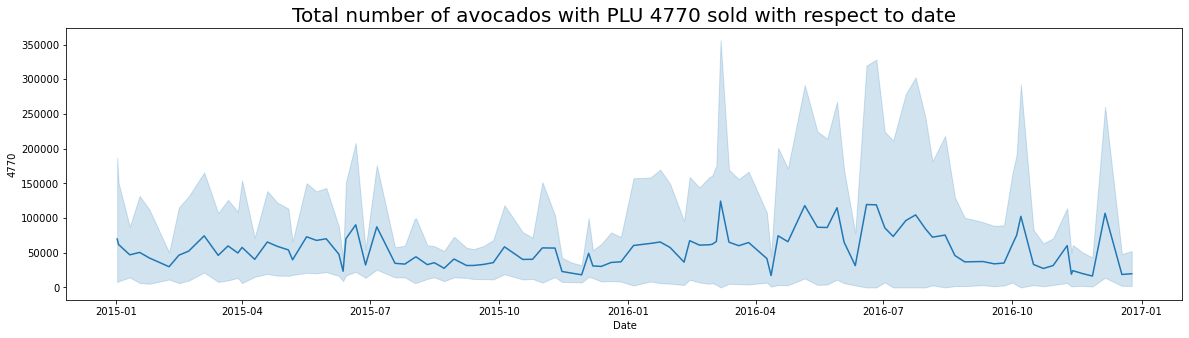

In [19]:
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="4770",  data=Avacado_new)
plt.title("Total number of avocados with PLU 4770 sold with respect to date", fontsize = 20)
plt.show()

PLU 4770 drops at the beggining of the year.

Near 2016-04 to 2016-07 Sales increased.

From start to last the Total number of avocados with PLU 4770 sold decreased.

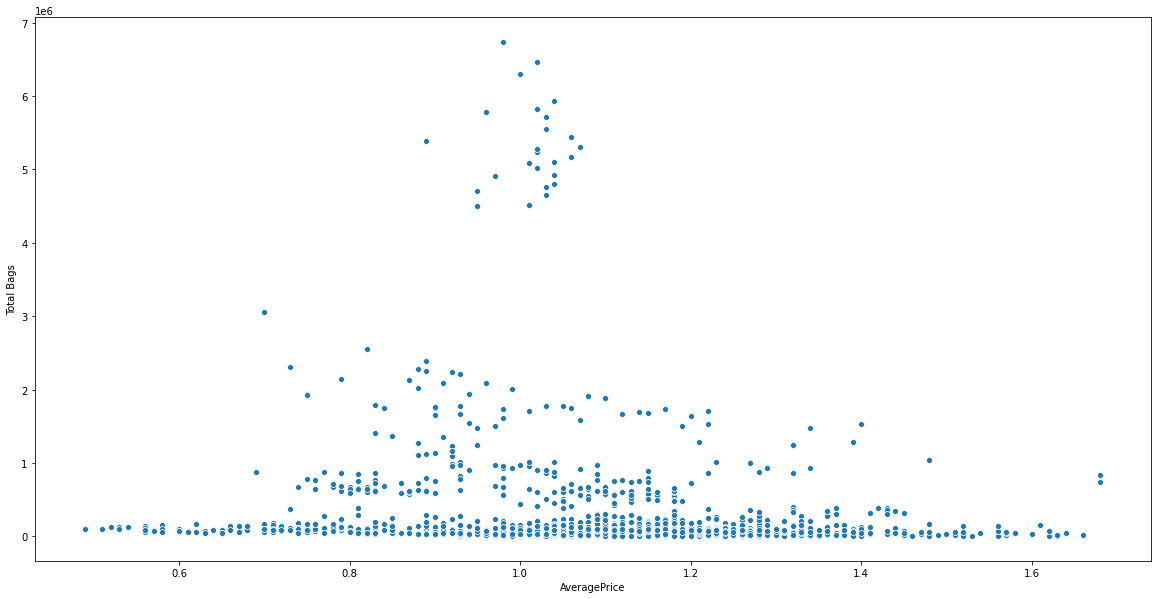

In [20]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'Total Bags', data = Avacado_new)

    The average price per Toatl Bags is spread across the range of Average Price.
    The Majority of Bags prices lies under 30,00,000.

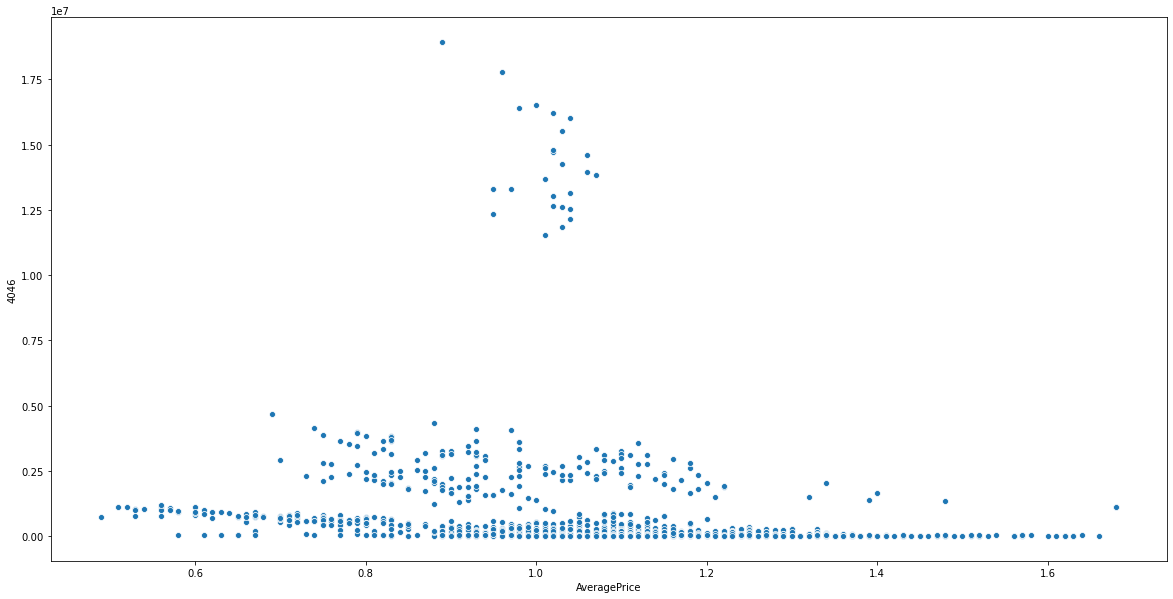

In [21]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = '4046', data = Avacado_new)

    The average price per Total number of avocados with PLU 4046 sold is spread across the range of Average Price.
    The Majority of PLU 4046 lies under 50,00,000.

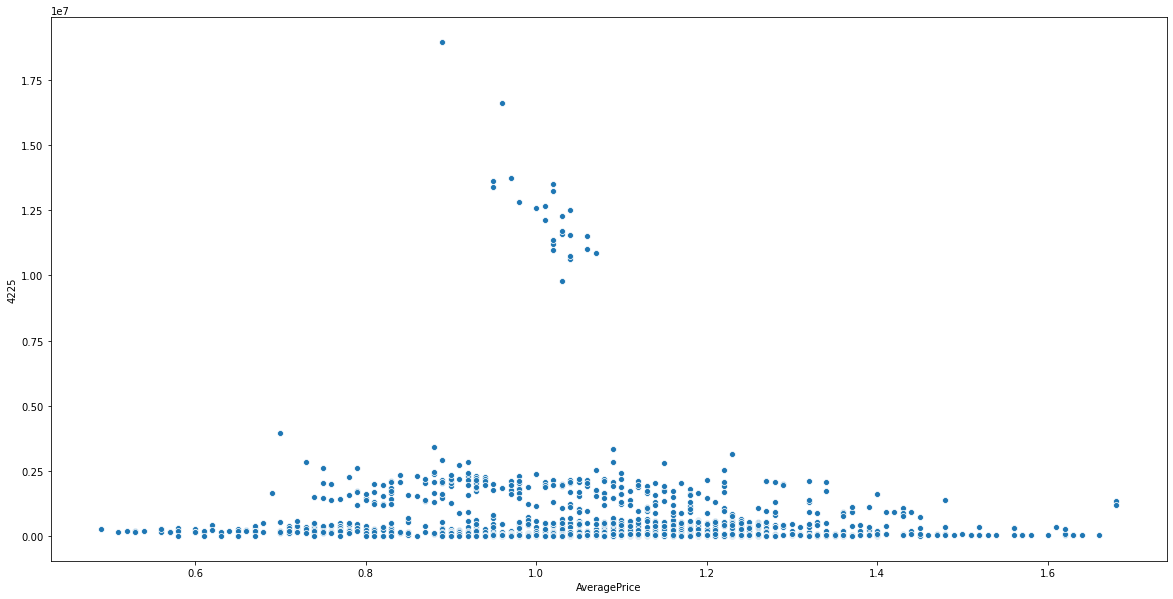

In [22]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = '4225', data = Avacado_new)

    The average price per Total number of avocados with PLU 4225 sold is spread across the range of Average Price.
    The Majority of PLU 4225 lies under 25,00,000.

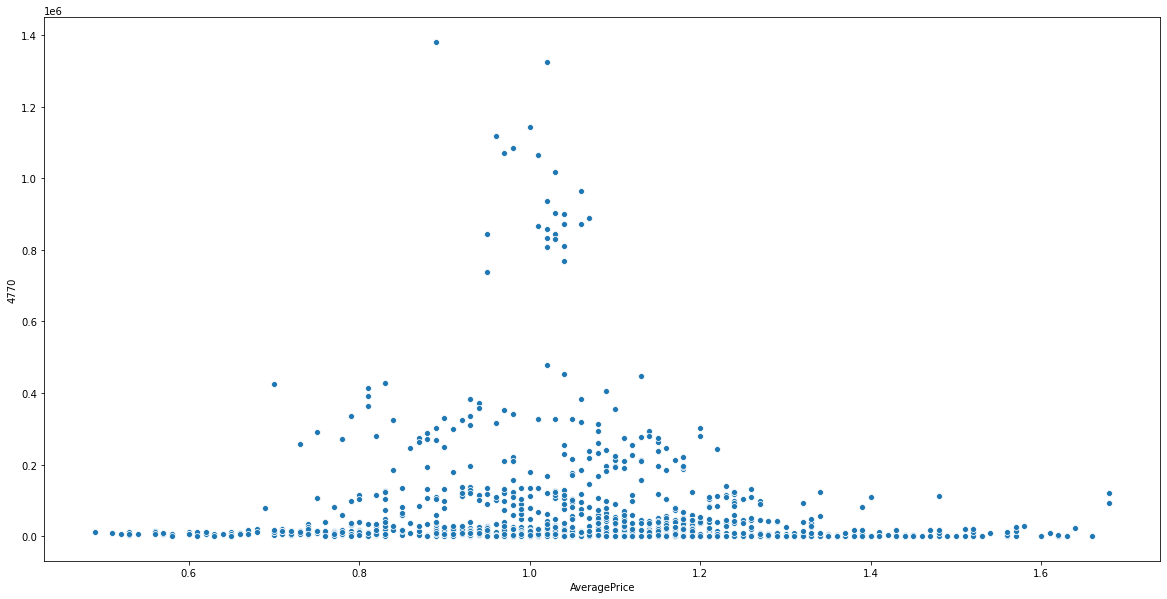

In [23]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = '4770', data = Avacado_new)

    The average price per Total number of avocados with PLU 4770 sold is spread across the range of Average Price.
    The Majority of PLU 4770 lies under 4,00,000.

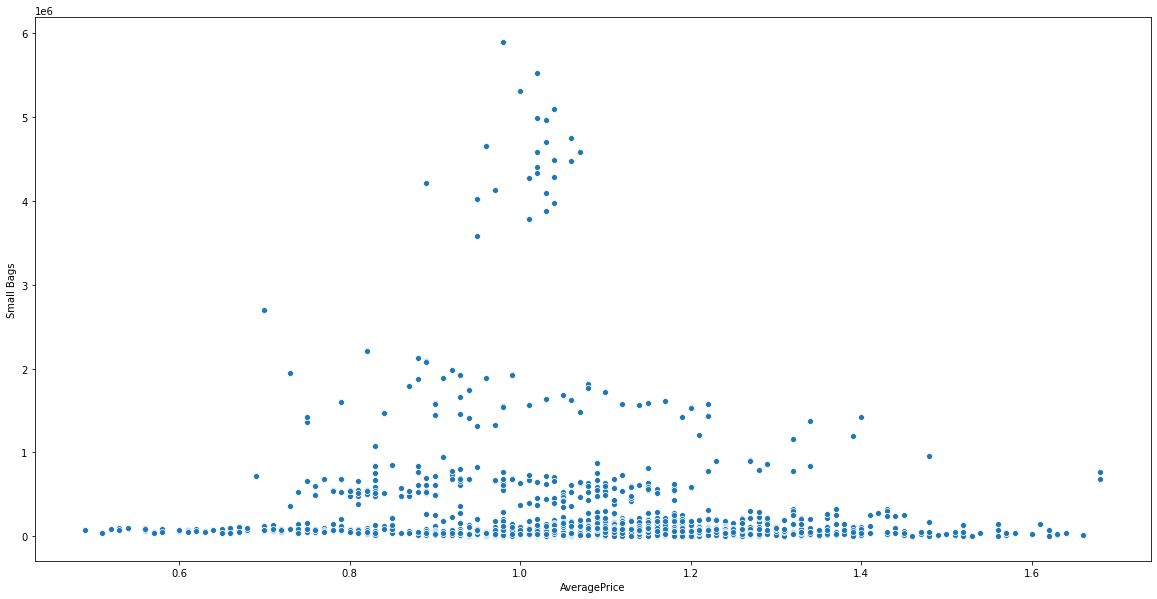

In [24]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'Small Bags', data = Avacado_new)

    The average price per Small Bags is spread across the range of Average Price.
    The Majority of Small Bags lies under 20,00,000.

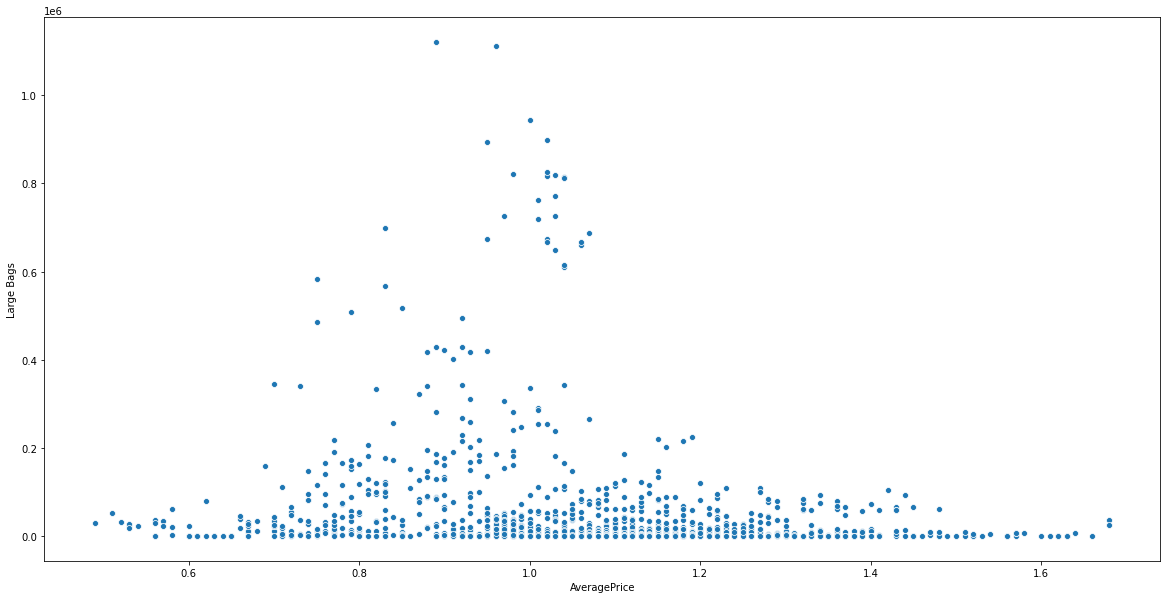

In [25]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'Large Bags', data = Avacado_new)

    The average price per Large Bags is spread across the range of Average Price.
    The Majority of Large Bags lies under 4,00,000.

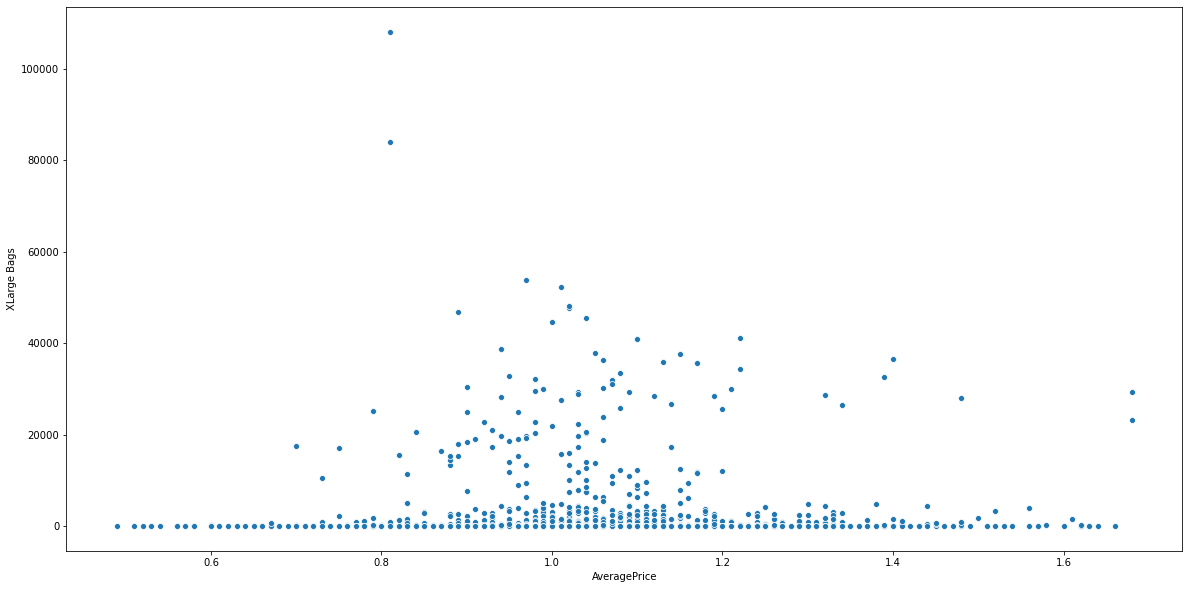

In [26]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'XLarge Bags', data = Avacado_new)

    The average price per XLarge Bags is spread across the range of Average Price.
    Almost all XLarge Bags lies under 60,000.
    Only 2 values are more than 60,000.

[Text(0, 0, 'Albany'),
 Text(0, 0, 'Atlanta'),
 Text(0, 0, 'BaltimoreWashington'),
 Text(0, 0, 'Boise'),
 Text(0, 0, 'Boston'),
 Text(0, 0, 'BuffaloRochester'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Charlotte'),
 Text(0, 0, 'Chicago'),
 Text(0, 0, 'Columbus'),
 Text(0, 0, 'DallasFtWorth'),
 Text(0, 0, 'Denver'),
 Text(0, 0, 'Detroit'),
 Text(0, 0, 'GrandRapids'),
 Text(0, 0, 'GreatLakes'),
 Text(0, 0, 'HarrisburgScranton'),
 Text(0, 0, 'HartfordSpringfield'),
 Text(0, 0, 'Houston'),
 Text(0, 0, 'Indianapolis'),
 Text(0, 0, 'Jacksonville'),
 Text(0, 0, 'LasVegas'),
 Text(0, 0, 'LosAngeles'),
 Text(0, 0, 'Louisville'),
 Text(0, 0, 'MiamiFtLauderdale'),
 Text(0, 0, 'Midsouth'),
 Text(0, 0, 'Nashville'),
 Text(0, 0, 'NewYork'),
 Text(0, 0, 'Northeast'),
 Text(0, 0, 'NorthernNewEngland'),
 Text(0, 0, 'Orlando'),
 Text(0, 0, 'Philadelphia'),
 Text(0, 0, 'PhoenixTucson'),
 Text(0, 0, 'Pittsburgh'),
 Text(0, 0, 'Plains'),
 Text(0, 0, 'Portland'),
 Text(0, 0, 'RaleighGreensboro'),
 Text(0, 0,

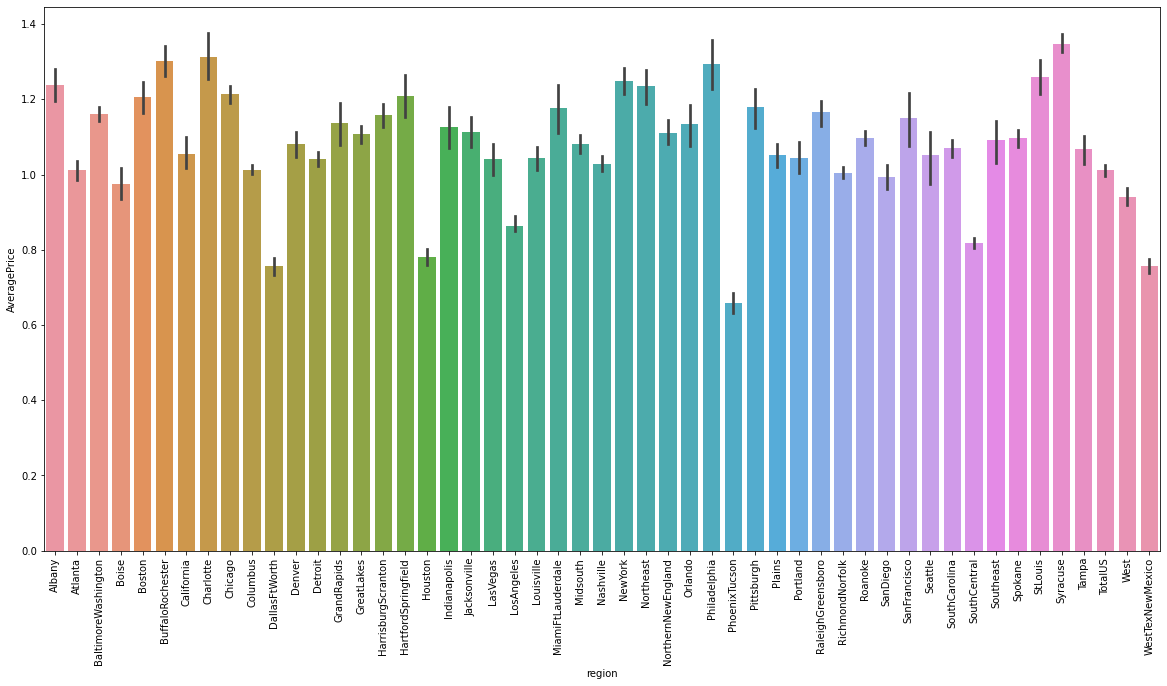

In [27]:
fig = plt.figure(figsize = (20,10))
ax=sns.barplot(x = 'region', y = 'AveragePrice', data = Avacado_new)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

StLouis have height AveragePrice 1.3

# Multi-Variate Analysis

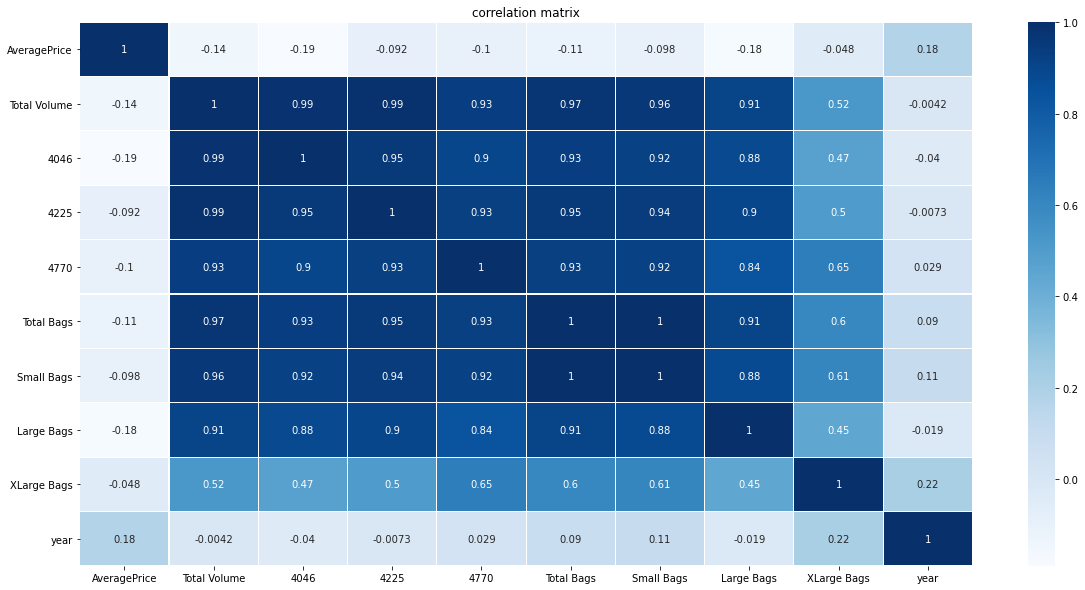

In [28]:
#Multivariate Analysis
fig=plt.figure(figsize=(20,10))
hc=Avacado_new.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

There is not much corelation between Average Price and any other column.

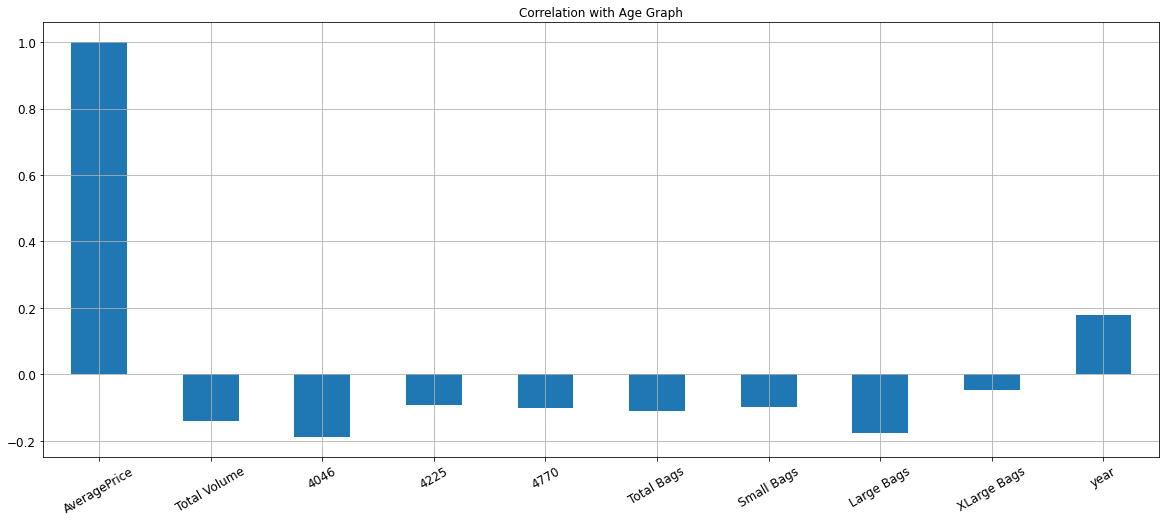

In [29]:
#Correlation with AveragePrice with respect to attributes
Avacado_new.corrwith(Avacado_new.AveragePrice).plot.bar(
        figsize = (20, 8), title = "Correlation with Age Graph", fontsize = 12,
        rot = 30, grid = True)

4046, Large Bags and Year have some corelation with Avergae but at very low level

# Data Cleaning

In [30]:
#Converting Date to ordinal for ease of prediction
import datetime as dt
Avacado_new['Date'] = pd.to_datetime(Avacado_new['Date'])
Avacado_new['Date'] = Avacado_new['Date'].map(dt.datetime.toordinal)
Avacado_new.head() #Checking top 5 rows of dataset

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,735761,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


Converted Date into Ordinal date because it is helpful to train and predict our data

In [31]:
Avacado_new.dtypes #Checking the datatype of each attribute

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [32]:
#Year is same as date-year, we can drop it.
Avacado_new.drop('year', axis=1, inplace=True)

In [33]:
Avacado_new['type'].unique() #Checking the number of unique values in type column

array(['conventional'], dtype=object)

In [34]:
#Avacado_new['type'] only have 1 value across all the rows, which will not help us to predict.
Avacado_new.drop('type', axis=1, inplace=True)

# Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #Initlize LabelEncoder to le 
#Avacado_new["region"] = le.fit_transform(Avacado_new["region"])

In [36]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
Avacado_new["region"] = enc.fit_transform(Avacado_new["region"].values.reshape(-1,1))

In [37]:
Avacado_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0
1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0
2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0
3,735761,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0
4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0


In [38]:
#Avacado_new.drop('type', axis=1, inplace=True)

In [39]:
#shuffling the dataset
#This will Shuffle our dataset and it will avoid biasness of prediction
Avacado_new = Avacado_new.sample(frac=1,random_state=0)

In [40]:
Avacado_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
1224,735840,1.03,5138256.91,2163511.05,1986059.01,124657.84,864029.01,624782.63,239195.91,50.47,49.0
580,735876,1.10,85446.43,2278.40,60221.59,606.53,22339.91,9533.88,12740.14,65.89,22.0
9,735896,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,0.0
686,735672,1.34,3135991.73,111777.91,2082038.09,5531.34,936644.39,843930.39,92714.00,0.00,27.0
685,735679,1.22,3520408.65,118765.00,2526519.62,5436.84,869687.19,782209.83,87477.36,0.00,27.0


In [41]:
Avacado_new.skew()

Date            0.923615
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
dtype: float64

In [42]:
#Reducing the skewness of Total Volume using log
import numpy as np
Avacado_new['Total Volume']=np.log(Avacado_new['Total Volume'])

In [43]:
Avacado_new['Total Volume'].skew()

0.6674608508123421

In [44]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in Avacado_new.columns:
    if Avacado_new[i].dtype != "object":
        if ((len(pd.unique(Avacado_new[i]))) > 2):
            if abs(Avacado_new.loc[:,i].skew())>0.5:
                Avacado_new.loc[:,i]=PT.fit_transform(Avacado_new.loc[:,i].values.reshape(-1,1))

In [45]:
Avacado_new.skew()

Date            0.922547
AveragePrice   -0.109444
Total Volume    0.046358
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
region          0.288146
dtype: float64

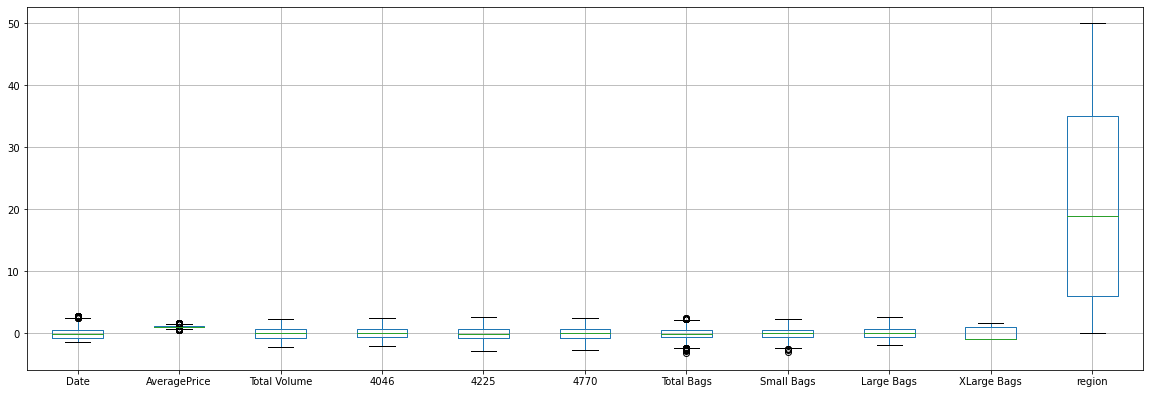

In [46]:
#Checking the outliers again
import matplotlib.pyplot as plt
import seaborn as sns
Avacado_new.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [47]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Avacado_new))
print(np.where(z>3))

(array([  47,  284,  407,  754,  754, 1237], dtype=int64), array([1, 1, 1, 6, 7, 1], dtype=int64))


In [48]:
#checking the shape of the data
#df=Avacado_new
df=Avacado_new[(z<3).all(axis = 1)]
print(Avacado_new.shape)
print(df.shape)

(1517, 11)
(1512, 11)


In [49]:
#checking for how much data we lost
loss_percent=(1517-1512)/1517*100
print(loss_percent)

0.3295978905735003


We lost less than 1 percent of data, which is not bad.

# Seprate independent variable and target variable

In [50]:
x = df.drop("AveragePrice", axis=1)
y = df["AveragePrice"]

# Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
1224,0.332093,0.821594,0.769621,0.791201,0.763406,0.830497,0.815224,0.798585,0.601812,0.98
580,0.381720,0.199695,0.130248,0.425950,0.348855,0.336359,0.179125,0.500263,0.627584,0.44
9,0.409429,0.167263,0.047676,0.434095,0.244168,0.149265,0.141878,0.274490,0.000000,0.00
686,0.099669,0.770598,0.477561,0.795774,0.504602,0.838327,0.844659,0.691235,0.000000,0.54
685,0.109181,0.782954,0.483288,0.814431,0.503304,0.831134,0.837378,0.685015,0.000000,0.54


After Scaling our data is in 0 to 1 range. It's now very convenient to train and test our data

# Finding Best Random State

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.4291732510591245  on Random_state  154


# Train Test Split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [54]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [55]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [56]:
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.4291732510591245
Mean Absolute Error:      0.11734258880936094
Mean Squared error:       0.02325685694703482
Root Mean Squared Error:  0.15250198997729447
[0.30428097 0.35380197 0.27954881 0.38621436 0.3259532  0.43421738
 0.40457046 0.34167321]
cross validation score:   0.3537825456631466
Difference between R2 score and cross validatio score is -  0.07539070539597792
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.84314203

Random Forest Regressor have height Accuracy and Cross validation score i.e. 84.31%

# Hyper Parameter Tuning

In [57]:
#import the randomized search CV
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth': np.arange(2,20), 'max_features': ['sqrt','auto', 'log2'], 'n_estimators': [100,200,500],'criterion' :['mse','mae'] }

In [58]:
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=8)
clf.fit(x_train, y_train)
clf.best_params_  #Best parameters

{'n_estimators': 200,
 'max_features': 'log2',
 'max_depth': 17,
 'criterion': 'mae'}

In [60]:
clf_pred = clf.best_estimator_.predict(x_test)

In [61]:
r2_score(y_test, clf_pred)

0.8436213421834211

Our model learnt almost 84.36%

# Saving the model

In [65]:
import joblib
joblib.dump(clf.best_estimator_,"PJ1_Avacado.obj")
RF_from_joblib=joblib.load('PJ1_Avacado.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([1.014975, 1.262725, 0.844675, 1.0951  , 1.15785 , 1.0764  ,
       1.133875, 1.25495 , 1.046275, 1.182925, 1.25185 , 1.193975,
       1.17215 , 1.1957  , 1.15335 , 0.91605 , 1.105725, 1.21175 ,
       1.184125, 0.97265 , 1.076275, 0.828   , 1.116475, 1.088725,
       1.06925 , 1.0827  , 1.3158  , 1.13785 , 1.101875, 0.6269  ,
       1.035375, 1.175525, 1.087325, 1.073175, 1.1928  , 0.63865 ,
       1.139325, 1.24735 , 0.639425, 1.176925, 1.3297  , 1.094   ,
       1.06015 , 0.6567  , 0.9906  , 1.2973  , 1.031675, 0.806075,
       1.09795 , 1.002825, 1.24185 , 0.9929  , 1.135525, 0.8009  ,
       1.100625, 1.0816  , 1.056425, 1.173825, 1.100375, 1.179025,
       1.2797  , 1.09535 , 0.8843  , 0.9933  , 1.160925, 1.013925,
       1.074425, 1.076325, 0.731425, 0.898975, 1.070375, 1.0049  ,
       1.281775, 1.05495 , 1.137275, 1.081725, 1.36775 , 1.1799  ,
       0.78785 , 1.36135 , 1.146875, 1.10765 , 1.1242  , 1.077575,
       1.049725, 0.743325, 1.029875, 0.76995 , 1.0615  , 1.096

In [66]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453
Predicted,1.014975,1.262725,0.844675,1.0951,1.15785,1.0764,1.133875,1.25495,1.046275,1.182925,1.25185,1.193975,1.17215,1.1957,1.15335,0.91605,1.105725,1.21175,1.184125,0.97265,1.076275,0.828,1.116475,1.088725,1.06925,1.0827,1.3158,1.13785,1.101875,0.6269,1.035375,1.175525,1.087325,1.073175,1.1928,0.63865,1.139325,1.24735,0.639425,1.176925,1.3297,1.094,1.06015,0.6567,0.9906,1.2973,1.031675,0.806075,1.09795,1.002825,1.24185,0.9929,1.135525,0.8009,1.100625,1.0816,1.056425,1.173825,1.100375,1.179025,1.2797,1.09535,0.8843,0.9933,1.160925,1.013925,1.074425,1.076325,0.731425,0.898975,1.070375,1.0049,1.281775,1.05495,1.137275,1.081725,1.36775,1.1799,0.78785,1.36135,1.146875,1.10765,1.1242,1.077575,1.049725,0.743325,1.029875,0.76995,1.0615,1.0967,0.9368,1.0351,0.9342,1.08445,1.080325,1.1899,1.050925,0.705225,1.20135,1.0495,1.026125,1.278025,1.155125,1.13455,1.038925,1.04315,1.033725,1.133475,1.142575,1.133575,1.172575,1.436725,1.034375,1.083075,1.3124,1.1861,1.047525,1.11265,0.85795,1.247475,1.145325,1.207775,0.791875,1.15835,1.087825,1.02855,1.205075,1.32085,1.392275,1.158725,1.305275,1.13715,1.1176,1.197025,0.64165,1.0308,1.128825,1.191975,1.0353,1.01195,0.9172,0.9427,1.202975,1.0969,1.31255,1.0446,1.1977,1.065775,1.080075,1.17825,1.1063,1.264,1.156325,1.047975,1.215,0.97205,1.05775,1.2486,1.05625,1.151875,1.218475,1.052925,1.052675,0.9612,1.300725,1.136025,1.206425,0.66775,0.838525,0.86735,0.754325,0.850875,1.1253,1.07555,1.3782,1.32465,0.93025,0.92525,0.8149,1.0154,1.18065,1.27505,1.0877,0.711925,1.158925,1.05265,1.00545,0.9305,1.2036,1.071975,0.8301,1.0992,1.0547,1.208675,1.1492,0.80065,1.144725,1.320325,1.172525,1.031575,1.0666,1.03845,1.0874,1.37535,0.91785,1.0547,1.0643,1.0416,1.311025,1.085275,1.3451,1.0519,1.026125,1.152075,1.14395,1.030225,1.060325,0.737625,1.1025,0.794475,1.19,0.8406,1.33635,1.171875,1.22875,1.29025,1.04465,1.1222,1.032575,1.10285,0.76205,1.169875,1.17215,1.20505,1.059,1.4201,0.716075,0.65965,1.04645,1.15945,1.181225,1.054925,0.738525,1.201925,1.08295,0.787525,0.9885,1.05445,1.0943,0.91085,1.15,1.320875,1.0713,1.456075,0.8529,1.057775,1.185025,1.1786,1.200675,1.030625,0.912375,1.028075,0.85915,1.028975,1.1988,0.9633,1.14005,1.045175,0.75165,0.93465,0.8426,0.8711,1.180675,1.08315,0.9075,1.2126,1.105,1.3306,0.702375,0.84895,1.217825,1.

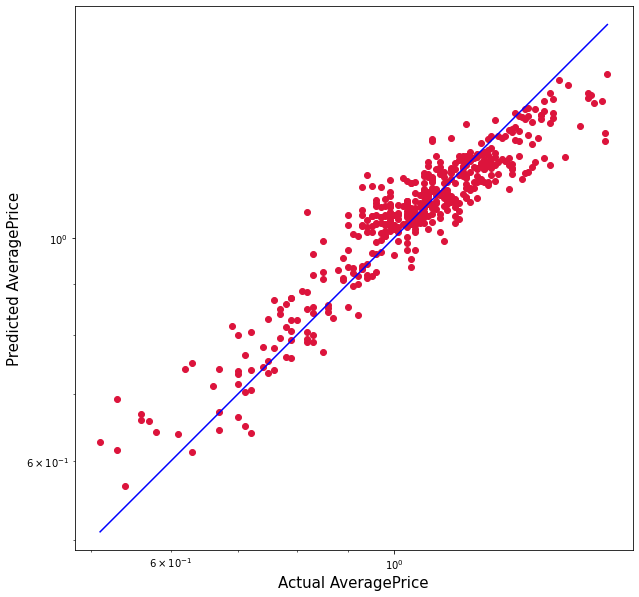

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test))
p2 = min(min(Predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual AveragePrice', fontsize=15)
plt.ylabel('Predicted AveragePrice', fontsize=15)
plt.axis('equal')
plt.show()